In [2]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sb

In [3]:
csv_games = pd.read_csv("C:/Users/Andres/Desktop/CSVs/vgsales.csv")

In [4]:
csv_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
most_sales_games = csv_games.head(10)

In [6]:
games_info = csv_games.describe()
delete_columns = ['Rank']
games_info = games_info.drop(delete_columns, axis=1)
games_info

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
sales_by_genre = csv_games.groupby('Genre')['Global_Sales'].sum().reset_index()
sales_by_genre

,Genre,Global_Sales
0,Action,1751.18
1,Adventure,239.04
2,Fighting,448.91
3,Misc,809.96
4,Platform,831.37
5,Puzzle,244.95
6,Racing,732.04
7,Role-Playing,927.37
8,Shooter,1037.37
9,Simulation,392.20


Text(0.5, 1.0, 'Global Sales by Genre from 1980 to 2020')

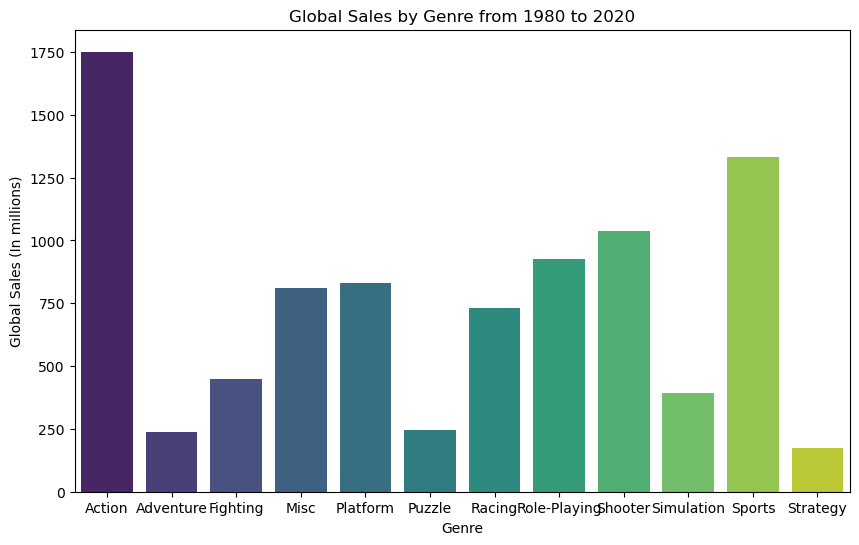

In [8]:
plot.figure(figsize=(10, 6))
sb.barplot(x='Genre', y='Global_Sales', data=sales_by_genre, palette='viridis')
plot.xlabel('Genre')
plot.ylabel('Global Sales (In millions)')
plot.title('Global Sales by Genre from 1980 to 2020')

In [9]:
total_global_sales = sales_by_genre['Global_Sales'].sum()
total_global_sales

8920.44

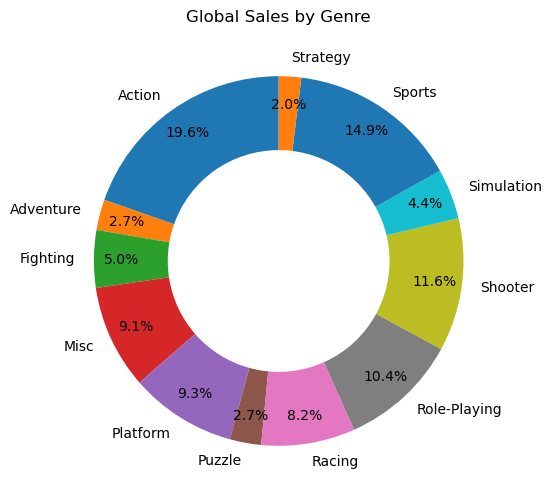

In [10]:
plot.figure(figsize = (8,6))
plot.pie(sales_by_genre['Global_Sales'],labels=sales_by_genre['Genre'],autopct='%1.1f%%',startangle=90,pctdistance=0.85,wedgeprops=dict(width=0.4))
plot.title('Global Sales by Genre')
plot.show()

In [12]:
sales_by_platform = csv_games.groupby('Platform')['Global_Sales'].sum().reset_index()

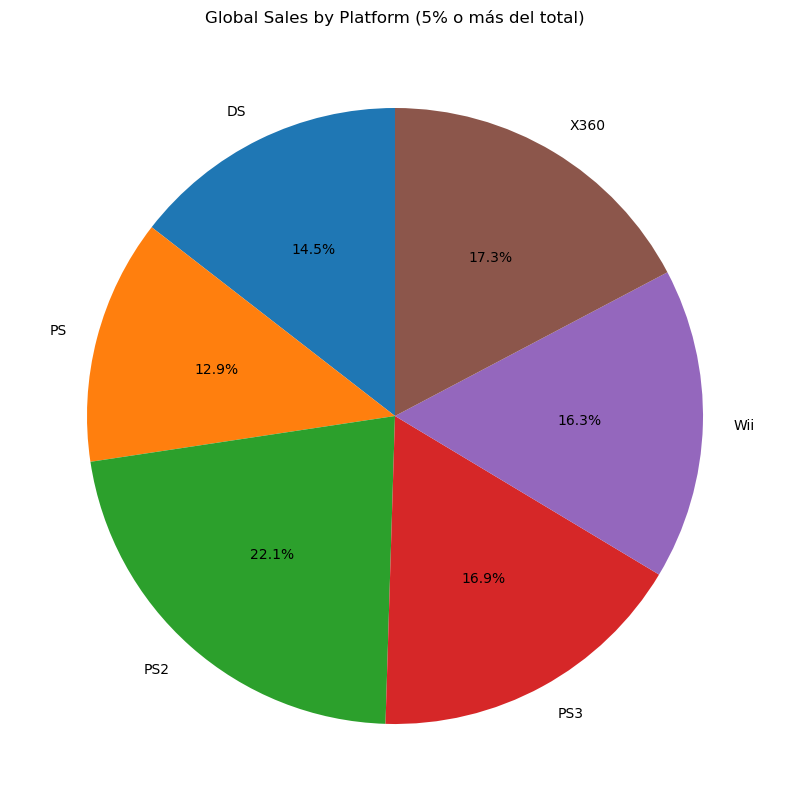

In [26]:
sales_by_platform['Percentage'] = (sales_by_platform['Global_Sales'] / sales_by_platform['Global_Sales'].sum()) * 100
threshold_percentage = 5
filtered_platforms = sales_by_platform[sales_by_platform['Percentage'] >= threshold_percentage]

plot.figure(figsize=(10, 10))
plot.pie(filtered_platforms['Global_Sales'], labels=filtered_platforms['Platform'], autopct='%1.1f%%', startangle=90)
plot.title(f'Global Sales by Platform ({threshold_percentage}% o más del total)')
plot.show()